In [73]:
#Импорт библиотек
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
print("Библиотеки загружены")

Библиотеки загружены


In [74]:
#Определение функции
def f(x):
    """
    f(x₁, x₂) = 10x₁ - x₂ + exp(x₁ + 2x₂)
    """
    return 10 * x[0] - x[1] + math.exp(x[0] + 2 * x[1])

def grad_f(x):
    """Градиент функции"""
    exp_term = math.exp(x[0] + 2 * x[1])
    return np.array([10 + exp_term, -1 + 2 * exp_term])

# Параметры задачи
x0 = np.array([1.0, 0.0])  # Начальное приближение
epsilon = 0.0003           # Точность

print("Функция определена:")
print(f"  f(x₁, x₂) = 10x₁ - x₂ + exp(x₁ + 2x₂)")
print(f"  Начальная точка: x0 = ({x0[0]}, {x0[1]})")
print(f"  Точность: ε = {epsilon}")

Функция определена:
  f(x₁, x₂) = 10x₁ - x₂ + exp(x₁ + 2x₂)
  Начальная точка: x0 = (1.0, 0.0)
  Точность: ε = 0.0003



3D-поверхность целевой функции
f(x₁, x₂) = 10x₁ - x₂ + exp(x₁ + 2x₂)
Область исследования: x₁ ∈ [-3, 3], x₂ ∈ [-3, 3]


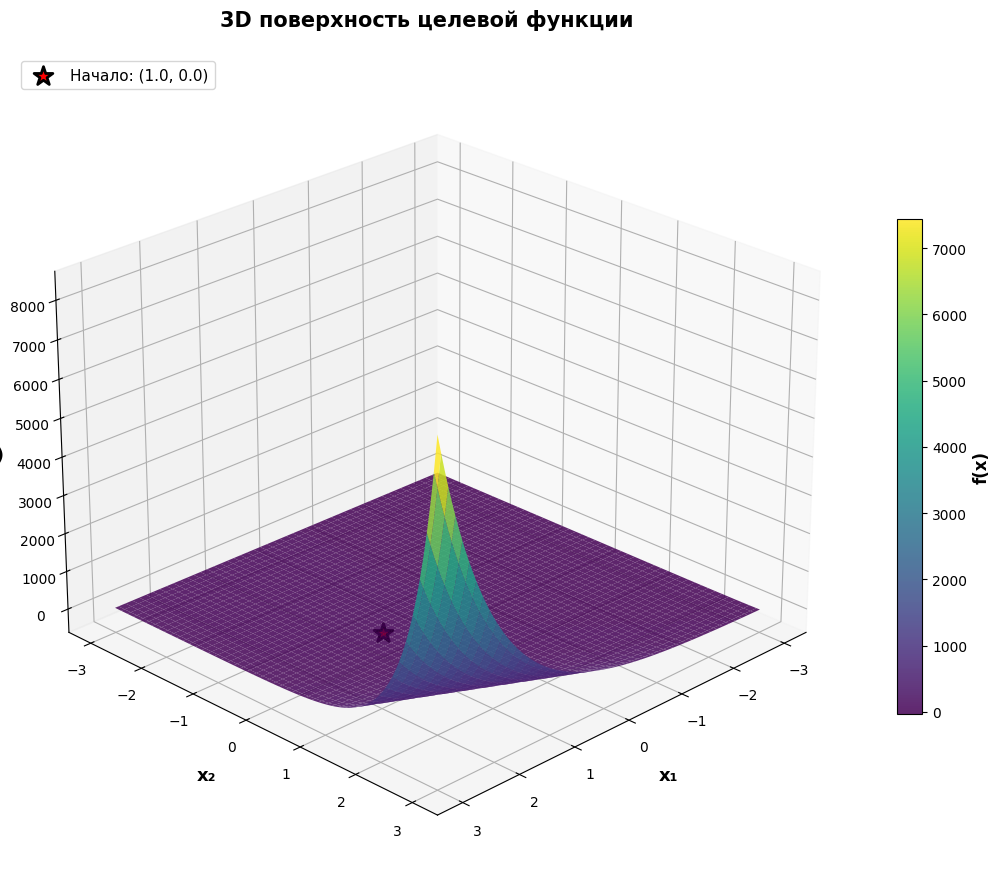


Характеристики функции в начальной точке:
  Начальная точка: x₁ = 1.0, x₂ = 0.0
  Значение функции: f(1.0, 0.0) = 12.7183

Градиент в начальной точке:
  ∂f/∂x₁ = 12.7183
  ∂f/∂x₂ = 4.4366
  Норма градиента: ||∇f|| = 13.4699

Направление убывания функции:
  • ∂f/∂x₁ > 0 → функция возрастает по x₁ → для уменьшения нужно двигаться в сторону -x₁
  • ∂f/∂x₂ > 0 → функция возрастает по x₂ → для уменьшения нужно двигаться в сторону -x₂
  • Методы будут двигаться в направлении антиградиента: [-∂f/∂x₁, -∂f/∂x₂]


In [75]:
#График целевой функции
print("\n" + "="*80)
print("3D-поверхность целевой функции")
print("="*80)
print("f(x₁, x₂) = 10x₁ - x₂ + exp(x₁ + 2x₂)")
print(f"Область исследования: x₁ ∈ [-3, 3], x₂ ∈ [-3, 3]")
print("="*80)

fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

x1 = np.linspace(-3, 3, 100)
x2 = np.linspace(-3, 3, 100)
X1, X2 = np.meshgrid(x1, x2)

Z = np.zeros_like(X1)
for i in range(X1.shape[0]):
    for j in range(X1.shape[1]):
        arg = X1[i, j] + 2 * X2[i, j]
        if arg > 100:
            Z[i, j] = 10 * X1[i, j] - X2[i, j] + math.exp(100)
        elif arg < -100:
            Z[i, j] = 10 * X1[i, j] - X2[i, j]
        else:
            Z[i, j] = f(np.array([X1[i, j], X2[i, j]]))

surf = ax.plot_surface(X1, X2, Z, cmap=cm.viridis, 
                      alpha=0.85, linewidth=0.2, 
                      antialiased=True, rstride=2, cstride=2)

cbar = fig.colorbar(surf, ax=ax, shrink=0.6, aspect=20)
cbar.set_label('f(x)', fontsize=12, fontweight='bold')

start_z = f(x0)
ax.scatter([x0[0]], [x0[1]], [start_z], 
           color='red', s=200, marker='*', 
           label=f'Начало: ({x0[0]}, {x0[1]})',
           edgecolors='black', linewidth=2, zorder=5)

ax.set_xlabel('x₁', fontsize=13, fontweight='bold', labelpad=10)
ax.set_ylabel('x₂', fontsize=13, fontweight='bold', labelpad=10)
ax.set_zlabel('f(x)', fontsize=13, fontweight='bold', labelpad=10)
ax.set_title('3D поверхность целевой функции', 
            fontsize=15, fontweight='bold', pad=20)

ax.legend(fontsize=11, loc='upper left')

ax.view_init(elev=25, azim=45)

ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nХарактеристики функции в начальной точке:")
print(f"  Начальная точка: x₁ = {x0[0]}, x₂ = {x0[1]}")
print(f"  Значение функции: f({x0[0]}, {x0[1]}) = {start_z:.4f}")
print(f"\nГрадиент в начальной точке:")
grad_start = grad_f(x0)
print(f"  ∂f/∂x₁ = {grad_start[0]:.4f}")
print(f"  ∂f/∂x₂ = {grad_start[1]:.4f}")
print(f"  Норма градиента: ||∇f|| = {np.linalg.norm(grad_start):.4f}")
print("\nНаправление убывания функции:")
print("  • ∂f/∂x₁ > 0 → функция возрастает по x₁ → для уменьшения нужно двигаться в сторону -x₁")
print("  • ∂f/∂x₂ > 0 → функция возрастает по x₂ → для уменьшения нужно двигаться в сторону -x₂")
print("  • Методы будут двигаться в направлении антиградиента: [-∂f/∂x₁, -∂f/∂x₂]")

In [76]:
def golden_section_search(f, a, b, eps=1e-6, max_iter=100):
    """Поиск минимума методом золотого сечения"""
    phi = (math.sqrt(5) - 1) / 2
    
    for _ in range(max_iter):
        if abs(b - a) < eps:
            break
            
        x1 = b - phi * (b - a)
        x2 = a + phi * (b - a)
        
        if f(x1) < f(x2):
            b = x2
        else:
            a = x1
    
    return (a + b) / 2

print("Вспомогательные функции созданы")

Вспомогательные функции созданы


In [77]:
def steepest_descent(f, grad, x0, eps=0.0003, max_iter=1000, verbose=True):
    """Метод наискорейшего спуска"""
    x = x0.copy()
    trajectory = [x.copy()]
    f_calls = 0
    grad_calls = 0
    iterations = 0
    
    if verbose:
        print("\n" + "="*60)
        print("Метод наискорейшего спуска")
        print("="*60)
        print(f"Начальная точка: [{x[0]:.4f}, {x[1]:.4f}]")
        print(f"f(x0) = {f(x):.6f}")
    
    for iteration in range(max_iter):
        
        grad_val = grad(x)
        grad_calls += 1
        grad_norm = np.linalg.norm(grad_val)
        
        if verbose and iteration % 5 == 0:
            print(f"Итерация {iteration:3d}: x=[{x[0]:7.4f}, {x[1]:7.4f}], "
                  f"f(x)={f(x):10.6f}, ||∇f||={grad_norm:10.6f}")
        
        
        if grad_norm < eps:
            if verbose:
                print(f"\n✓ Достигнута точность на итерации {iteration}")
                print(f"  ||∇f|| = {grad_norm:.6f} < ε = {eps}")
            break
        
        
        def phi(alpha):
            nonlocal f_calls
            f_calls += 1
            return f(x - alpha * grad_val)
        
       
        alpha_max = 1.0
        while phi(alpha_max) < phi(0):
            alpha_max *= 2
            if alpha_max > 100:
                break
        
        alpha_opt = golden_section_search(phi, 0, min(alpha_max, 10), eps/10)
        
       
        x = x - alpha_opt * grad_val
        trajectory.append(x.copy())
        iterations = iteration + 1
    
    if verbose:
        print(f"\n{'─'*50}")
        print("Результаты:")
        print(f"  Конечная точка: [{x[0]:.8f}, {x[1]:.8f}]")
        print(f"  f(x) = {f(x):.10f}")
        print(f"  Итераций: {iterations}")
        print(f"  Вызовов f(x): {f_calls}")
        print(f"  Вызовов ∇f(x): {grad_calls}")
        print(f"  Всего вычислений: {f_calls + grad_calls}")
        print("="*60)
    
    return {
        'x_min': x,
        'trajectory': np.array(trajectory),
        'f_calls': f_calls,
        'grad_calls': grad_calls,
        'iterations': iterations,
        'f_value': f(x)
    }

In [78]:
def hooke_jeeves(f, x0, step=0.5, step_reduction=0.5, eps=0.0003, 
                 max_iter=1000, verbose=True):
    """Метод Хука-Дживса (метод конфигураций)"""
    n = len(x0)
    x = x0.copy()
    x_base = x0.copy()
    f_base = f(x_base)
    
    trajectory = [x.copy()]
    f_calls = 1
    iterations = 0
    
    if verbose:
        print("\n" + "="*60)
        print("Метод Хука-Дживса")
        print("="*60)
        print(f"Начальная точка: [{x[0]:.4f}, {x[1]:.4f}]")
        print(f"f(x0) = {f_base:.6f}")
        print(f"Начальный шаг: {step}")
    
    while step > eps and iterations < max_iter:
        if verbose and iterations % 10 == 0:
            print(f"Итерация {iterations:3d}: x=[{x[0]:7.4f}, {x[1]:7.4f}], "
                  f"f(x)={f(x):10.6f}, шаг={step:10.6f}")
        
        # Исследующий поиск
        improved = False
        for i in range(n):
            original_value = x[i]
            
            # Пробуем положительное направление
            x[i] = original_value + step
            f_plus = f(x)
            f_calls += 1
            
            # Пробуем отрицательное направление
            x[i] = original_value - step
            f_minus = f(x)
            f_calls += 1
            
            # Возвращаем и вычисляем текущее значение
            x[i] = original_value
            f_current = f(x)
            f_calls += 1
            
            # Выбираем наилучшее направление
            if f_plus < f_current and f_plus <= f_minus:
                x[i] = original_value + step
                f_current = f_plus
                improved = True
            elif f_minus < f_current:
                x[i] = original_value - step
                f_current = f_minus
                improved = True
        
        # Если исследование дало улучшение
        if improved:
            # Поиск по образцу
            x_pattern = 2 * x - x_base
            f_pattern = f(x_pattern)
            f_calls += 1
            
            if f_pattern < f(x):
                x_base = x.copy()
                x = x_pattern.copy()
                f_base = f_pattern
            else:
                x_base = x.copy()
                f_base = f(x)
        else:
            # Уменьшаем шаг
            step *= step_reduction
        
        trajectory.append(x.copy())
        iterations += 1
        
        # Дополнительный критерий остановки
        if len(trajectory) > 2:
            f_prev = f(trajectory[-2])
            f_curr = f(x)
            if abs(f_curr - f_prev) < eps:
                if verbose:
                    print(f"\n✓ Малое изменение функции")
                break
    
    if verbose:
        print(f"\n{'─'*50}")
        print("РЕЗУЛЬТАТЫ:")
        print(f"  Конечная точка: [{x[0]:.8f}, {x[1]:.8f}]")
        print(f"  f(x) = {f(x):.10f}")
        print(f"  Финальный шаг: {step:.10f}")
        print(f"  Итераций: {iterations}")
        print(f"  Вызовов f(x): {f_calls}")
        print("="*60)
    
    return {
        'x_min': x,
        'trajectory': np.array(trajectory),
        'f_calls': f_calls,
        'grad_calls': 0,
        'iterations': iterations,
        'f_value': f(x),
        'final_step': step
    }

In [79]:
print("="*80)
print("Запуск методов")
print("="*80)
print(f"Функция: f(x₁, x₂) = 10x₁ - x₂ + exp(x₁ + 2x₂)")
print(f"Начальная точка: x0 = [{x0[0]}, {x0[1]}]")
print(f"Точность: ε = {epsilon}")
print("="*80)

# Запускаем метод наискорейшего спуска
print("\n" + "="*80)
print("1. Метод наискорейшего спуска")
print("="*80)
result_sd = steepest_descent(f, grad_f, x0, epsilon, verbose=True, max_iter=500)

print("\n" + "="*80)
print("2. Метод конфигураций")
print("="*80)
result_hj = hooke_jeeves(f, x0, step=0.5, step_reduction=0.5, 
                         eps=epsilon, verbose=True, max_iter=200)

print("\n✓ Оба метода завершены успешно!")

Запуск методов
Функция: f(x₁, x₂) = 10x₁ - x₂ + exp(x₁ + 2x₂)
Начальная точка: x0 = [1.0, 0.0]
Точность: ε = 0.0003

1. Метод наискорейшего спуска

Метод наискорейшего спуска
Начальная точка: [1.0000, 0.0000]
f(x0) = 12.718282
Итерация   0: x=[ 1.0000,  0.0000], f(x)= 12.718282, ||∇f||= 13.469885
Итерация   5: x=[-526.1822, -4.3656], f(x)=-5257.456550, ||∇f||= 10.049876
Итерация  10: x=[-1026.1816, 45.6343], f(x)=-10307.450801, ||∇f||= 10.049876
Итерация  15: x=[-1526.1811, 95.6343], f(x)=-15357.445052, ||∇f||= 10.049876
Итерация  20: x=[-2026.1805, 145.6342], f(x)=-20407.439303, ||∇f||= 10.049876
Итерация  25: x=[-2526.1799, 195.6341], f(x)=-25457.433554, ||∇f||= 10.049876
Итерация  30: x=[-3026.1794, 245.6341], f(x)=-30507.427804, ||∇f||= 10.049876
Итерация  35: x=[-3526.1788, 295.6340], f(x)=-35557.422055, ||∇f||= 10.049876
Итерация  40: x=[-4026.1782, 345.6340], f(x)=-40607.416306, ||∇f||= 10.049876
Итерация  45: x=[-4526.1777, 395.6339], f(x)=-45657.410557, ||∇f||= 10.049876
Итера

In [80]:
print("\n" + "="*80)
print("Сравнительная таблица результатов")
print("="*80)
print(f"{'Метод':<20} {'Точка (x₁, x₂)':<30} {'f(x)':<15} {'Итер.':<8} "
      f"{'f-вызовы':<10} {'∇-вызовы':<10} {'Всего':<8}")
print("-"*80)

methods = [
    ("Наиск. спуск", result_sd),
    ("Хука и Дживса", result_hj)
]

for name, res in methods:
    point_str = f"({res['x_min'][0]:.6f}, {res['x_min'][1]:.6f})"
    total_calls = res['f_calls'] + res['grad_calls']
    print(f"{name:<20} {point_str:<30} {res['f_value']:<15.10f} "
          f"{res['iterations']:<8} {res['f_calls']:<10} "
          f"{res['grad_calls']:<10} {total_calls:<8}")

print("="*80)

total_sd = result_sd['f_calls'] + result_sd['grad_calls']
total_hj = result_hj['f_calls'] + result_hj['grad_calls']

print("\nАнализ эффективности:")
if total_sd < total_hj:
    print(f" Метод наискорейшего спуска эффективнее:")
    print(f"  - Экономия: {total_hj - total_sd} вычислений")
    print(f"  - На {((total_hj - total_sd)/total_hj*100):.1f}% эффективнее")
else:
    print(f" Метод Хука-Дживса эффективнее:")
    print(f"  - Экономия: {total_sd - total_hj} вычислений")
    print(f"  - На {((total_sd - total_hj)/total_sd*100):.1f}% эффективнее")


Сравнительная таблица результатов
Метод                Точка (x₁, x₂)                 f(x)            Итер.    f-вызовы   ∇-вызовы   Всего   
--------------------------------------------------------------------------------
Наиск. спуск         (-50026.125866, 4945.628733)   -505206.8873950195 500      34000      500        34500   
Хука и Дживса        (-10149.000000, 5074.000000)   -106563.6321205588 200      1401       0          1401    

Анализ эффективности:
 Метод Хука-Дживса эффективнее:
  - Экономия: 33099 вычислений
  - На 95.9% эффективнее


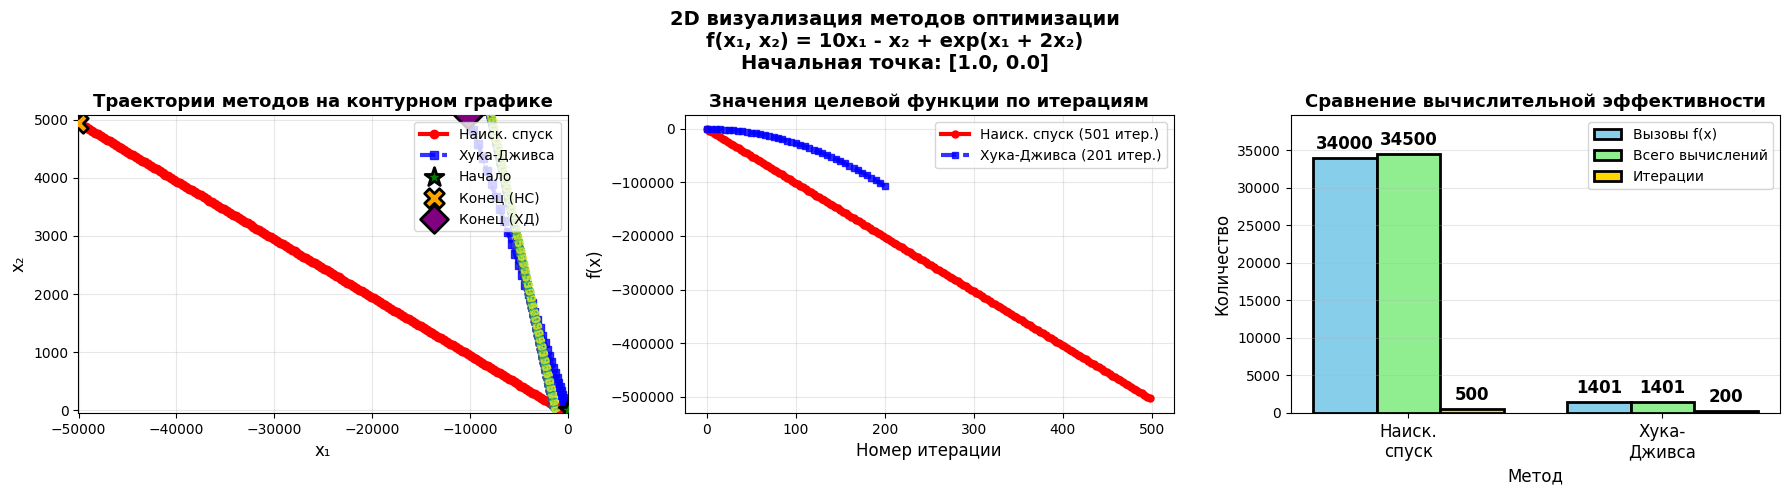

In [81]:

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle(f'2D визуализация методов оптимизации\nf(x₁, x₂) = 10x₁ - x₂ + exp(x₁ + 2x₂)\nНачальная точка: [{x0[0]}, {x0[1]}]', 
             fontsize=14, fontweight='bold')


all_points = np.vstack([result_sd['trajectory'], result_hj['trajectory']])
x1_min, x1_max = all_points[:, 0].min() - 0.5, all_points[:, 0].max() + 0.5
x2_min, x2_max = all_points[:, 1].min() - 0.5, all_points[:, 1].max() + 0.5


x1 = np.linspace(x1_min, x1_max, 200)
x2 = np.linspace(x2_min, x2_max, 200)
X1, X2 = np.meshgrid(x1, x2)


Z = np.zeros_like(X1)
for i in range(X1.shape[0]):
    for j in range(X1.shape[1]):
        arg = X1[i, j] + 2 * X2[i, j]
        if arg > 100:
            Z[i, j] = 10 * X1[i, j] - X2[i, j] + math.exp(100)
        elif arg < -100:
            Z[i, j] = 10 * X1[i, j] - X2[i, j]
        else:
            Z[i, j] = f(np.array([X1[i, j], X2[i, j]]))

# 1. Контурный график с траекториями 
ax = axes[0]
contour = ax.contour(X1, X2, Z, levels=30, cmap='viridis', alpha=0.7, linewidths=0.8)
plt.clabel(contour, inline=1, fontsize=8)

# Траектория метода наискорейшего спуска
traj_sd = result_sd['trajectory']
ax.plot(traj_sd[:, 0], traj_sd[:, 1], 'r-', linewidth=3, 
        marker='o', markersize=6, markevery=3, label='Наиск. спуск')

# Траектория метода Хука и Дживса
traj_hj = result_hj['trajectory']
ax.plot(traj_hj[:, 0], traj_hj[:, 1], 'b--', linewidth=3, 
        marker='s', markersize=6, markevery=5, label='Хука-Дживса', alpha=0.8)

ax.scatter(x0[0], x0[1], color='green', s=200, marker='*', 
           label='Начало', edgecolors='black', linewidth=2, zorder=5)
ax.scatter(result_sd['x_min'][0], result_sd['x_min'][1], 
           color='orange', s=200, marker='X', label='Конец (НС)', 
           edgecolors='black', linewidth=2, zorder=5)
ax.scatter(result_hj['x_min'][0], result_hj['x_min'][1], 
           color='purple', s=200, marker='D', label='Конец (ХД)',
           edgecolors='black', linewidth=2, zorder=5)

ax.set_xlabel('x₁', fontsize=12)
ax.set_ylabel('x₂', fontsize=12)
ax.set_title('Траектории методов на контурном графике', fontsize=13, fontweight='bold')
ax.legend(loc='upper right', fontsize=10)
ax.grid(True, alpha=0.3)
ax.set_aspect('auto')

# 2. График целевой функции f(x) по итерациям 
ax = axes[1]
f_vals_sd = [f(point) for point in traj_sd]
f_vals_hj = [f(point) for point in traj_hj]

ax.plot(range(len(f_vals_sd)), f_vals_sd, 'r-', linewidth=3, 
        label=f'Наиск. спуск ({len(f_vals_sd)} итер.)', marker='o', markersize=5, markevery=3)
ax.plot(range(len(f_vals_hj)), f_vals_hj, 'b--', linewidth=3, 
        label=f'Хука-Дживса ({len(f_vals_hj)} итер.)', alpha=0.8, 
        marker='s', markersize=5, markevery=5)

ax.set_xlabel('Номер итерации', fontsize=12)
ax.set_ylabel('f(x)', fontsize=12)
ax.set_title('Значения целевой функции по итерациям', fontsize=13, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)
ax.set_yscale('linear')

# 3. Сравнение эффективности 
ax = axes[2]
methods_names = ['Наиск.\nспуск', 'Хука-\nДживса']

f_calls = [result_sd['f_calls'], result_hj['f_calls']]
total_calls = [result_sd['f_calls'] + result_sd['grad_calls'], 
               result_hj['f_calls'] + result_hj['grad_calls']]
iterations = [result_sd['iterations'], result_hj['iterations']]

x_pos = np.arange(len(methods_names))
width = 0.25


bars1 = ax.bar(x_pos - width, f_calls, width, label='Вызовы f(x)', 
               color='skyblue', edgecolor='black', linewidth=2)
bars2 = ax.bar(x_pos, total_calls, width, label='Всего вычислений', 
               color='lightgreen', edgecolor='black', linewidth=2)
bars3 = ax.bar(x_pos + width, iterations, width, label='Итерации', 
               color='gold', edgecolor='black', linewidth=2)


for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + max(total_calls)*0.02,
               f'{int(height)}', ha='center', va='bottom', fontsize=12, fontweight='bold')

ax.set_xlabel('Метод', fontsize=12)
ax.set_ylabel('Количество', fontsize=12)
ax.set_title('Сравнение вычислительной эффективности', fontsize=13, fontweight='bold')
ax.set_xticks(x_pos)
ax.set_xticklabels(methods_names, fontsize=12)
ax.legend(fontsize=10, loc='upper right')
ax.grid(True, alpha=0.3, axis='y')
ax.set_ylim(0, max(total_calls) * 1.15)

plt.tight_layout()
plt.show()

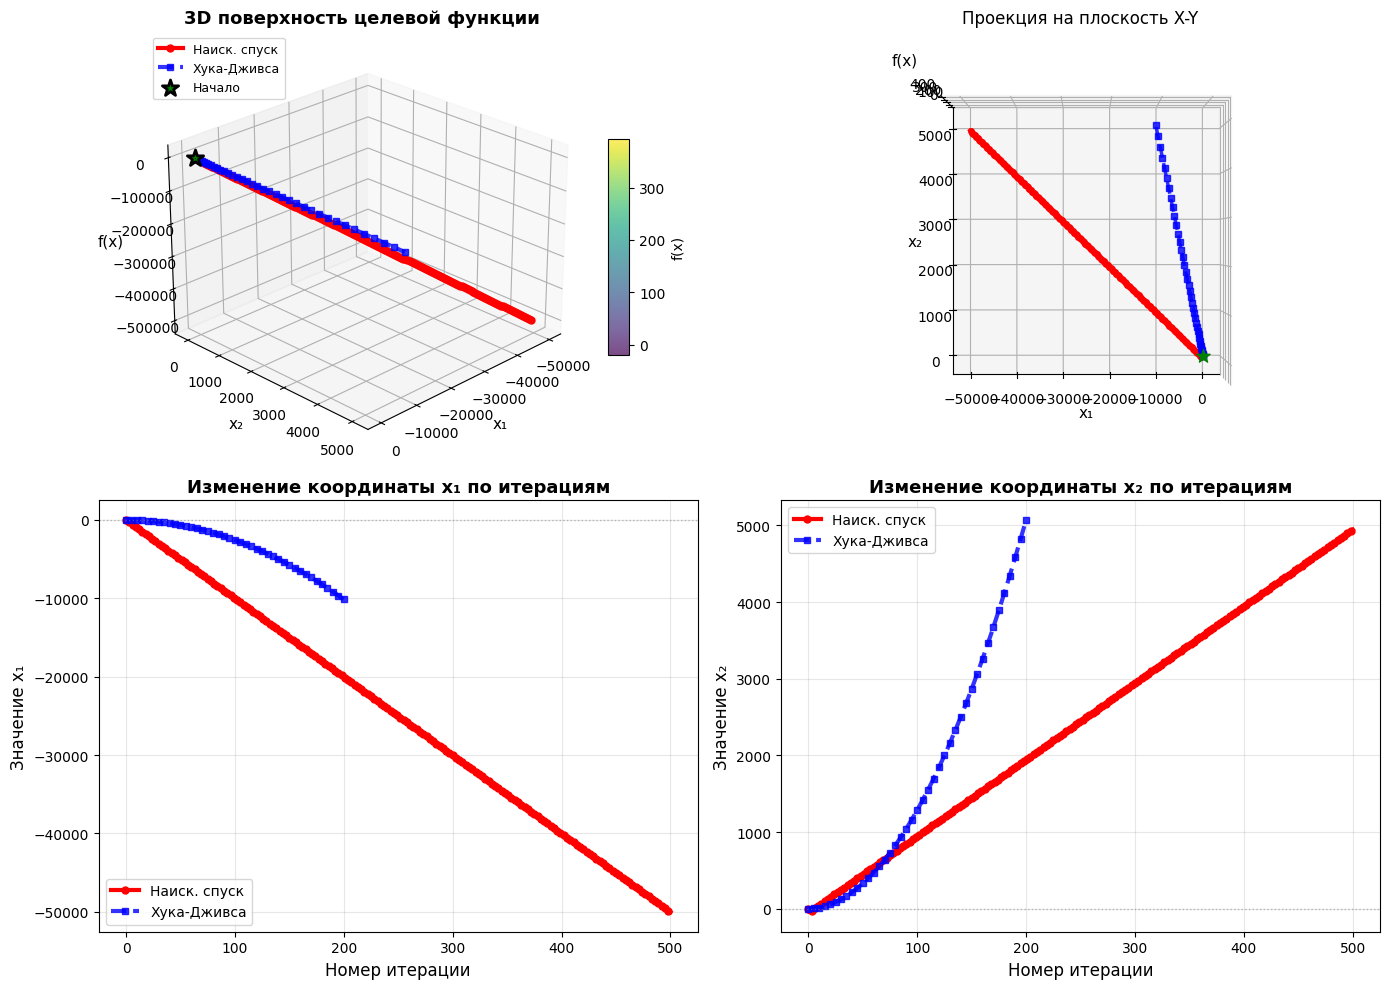

In [82]:

fig = plt.figure(figsize=(14, 10))


ax1 = fig.add_subplot(221, projection='3d')
ax1.set_title('3D поверхность целевой функции', fontsize=13, fontweight='bold')


x1_3d = np.linspace(-2, 2, 80)
x2_3d = np.linspace(-2, 2, 80)
X1_3d, X2_3d = np.meshgrid(x1_3d, x2_3d)
Z_3d = np.zeros_like(X1_3d)

for i in range(X1_3d.shape[0]):
    for j in range(X1_3d.shape[1]):
        arg = X1_3d[i, j] + 2 * X2_3d[i, j]
        if arg > 100:
            Z_3d[i, j] = 10 * X1_3d[i, j] - X2_3d[i, j] + math.exp(100)
        elif arg < -100:
            Z_3d[i, j] = 10 * X1_3d[i, j] - X2_3d[i, j]
        else:
            Z_3d[i, j] = f(np.array([X1_3d[i, j], X2_3d[i, j]]))


surf = ax1.plot_surface(X1_3d, X2_3d, Z_3d, cmap=cm.viridis, alpha=0.7, 
                       linewidth=0.2, antialiased=True, rstride=2, cstride=2)


fig.colorbar(surf, ax=ax1, shrink=0.5, aspect=10, label='f(x)')


f_vals_sd = [f(point) for point in traj_sd]
f_vals_hj = [f(point) for point in traj_hj]

ax1.plot(traj_sd[:, 0], traj_sd[:, 1], f_vals_sd, 
         color='red', linewidth=3, marker='o', markersize=5,
         label='Наиск. спуск', markevery=3)
ax1.plot(traj_hj[:, 0], traj_hj[:, 1], f_vals_hj, 
         color='blue', linewidth=3, marker='s', markersize=5,
         linestyle='--', label='Хука-Дживса', alpha=0.8, markevery=5)


ax1.scatter([x0[0]], [x0[1]], [f(x0)], 
            color='green', s=150, marker='*', label='Начало',
            edgecolors='black', linewidth=2)

ax1.set_xlabel('x₁', fontsize=11)
ax1.set_ylabel('x₂', fontsize=11)
ax1.set_zlabel('f(x)', fontsize=11)
ax1.legend(fontsize=9, loc='upper left')
ax1.view_init(elev=25, azim=45)


ax2 = fig.add_subplot(222, projection='3d')
ax2.set_title('Проекция траекторий на плоскость X-Y', fontsize=13, fontweight='bold')


contour = ax2.contour(X1_3d, X2_3d, Z_3d, 15, cmap=cm.viridis, offset=Z_3d.min())


zeros_sd = np.zeros(len(traj_sd)) + Z_3d.min()
zeros_hj = np.zeros(len(traj_hj)) + Z_3d.min()

ax2.plot(traj_sd[:, 0], traj_sd[:, 1], zeros_sd,
         color='red', linewidth=2.5, marker='o', markersize=4,
         label='Наиск. спуск', markevery=3)
ax2.plot(traj_hj[:, 0], traj_hj[:, 1], zeros_hj,
         color='blue', linewidth=2.5, marker='s', markersize=4,
         linestyle='--', label='Хука-Дживса', alpha=0.8, markevery=5)

ax2.scatter([x0[0]], [x0[1]], [Z_3d.min()], 
            color='green', s=100, marker='*', label='Начало')

ax2.set_xlabel('x₁', fontsize=11)
ax2.set_ylabel('x₂', fontsize=11)
ax2.set_zlabel('f(x)', fontsize=11)
ax2.set_title('Проекция на плоскость X-Y', fontsize=12)
ax2.view_init(elev=90, azim=-90)  # Вид строго сверху


ax3 = fig.add_subplot(223)
ax3.set_title('Изменение координаты x₁ по итерациям', fontsize=13, fontweight='bold')

ax3.plot(range(len(traj_sd)), traj_sd[:, 0], 'r-', linewidth=3, 
         label='Наиск. спуск', marker='o', markersize=5, markevery=3)
ax3.plot(range(len(traj_hj)), traj_hj[:, 0], 'b--', linewidth=3, 
         label='Хука-Дживса', alpha=0.8, marker='s', markersize=5, markevery=5)

ax3.axhline(y=0, color='gray', linestyle=':', alpha=0.5, linewidth=1)
ax3.set_xlabel('Номер итерации', fontsize=12)
ax3.set_ylabel('Значение x₁', fontsize=12)
ax3.legend(fontsize=10)
ax3.grid(True, alpha=0.3)


ax4 = fig.add_subplot(224)
ax4.set_title('Изменение координаты x₂ по итерациям', fontsize=13, fontweight='bold')

ax4.plot(range(len(traj_sd)), traj_sd[:, 1], 'r-', linewidth=3, 
         label='Наиск. спуск', marker='o', markersize=5, markevery=3)
ax4.plot(range(len(traj_hj)), traj_hj[:, 1], 'b--', linewidth=3, 
         label='Хука-Дживса', alpha=0.8, marker='s', markersize=5, markevery=5)

ax4.axhline(y=0, color='gray', linestyle=':', alpha=0.5, linewidth=1)
ax4.set_xlabel('Номер итерации', fontsize=12)
ax4.set_ylabel('Значение x₂', fontsize=12)
ax4.legend(fontsize=10)
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


Анализ поведения функции

Значения функции в разных точках:
----------------------------------------
  Начальная точка      f(  1.0,   0.0) =       12.718282
  Точка (0,0)          f(  0.0,   0.0) =        1.000000
  Точка (-1,0)         f( -1.0,   0.0) =       -9.632121
  Точка (0,0.5)        f(  0.0,   0.5) =        2.218282
  Точка (-5,0)         f( -5.0,   0.0) =      -49.993262

Анализ градиента в начальной точке:
----------------------------------------
  ∇f(1.0, 0.0) = [12.718282, 4.436564]
  ||∇f|| = 13.469885

Анализ направления убывания:
----------------------------------------
  В начальной точке градиент:
    ∂f/∂x₁ = 12.718282 > 0 → f возрастает по x₁
    ∂f/∂x₂ = 4.436564 > 0 → f возрастает по x₂
  Метод будет двигаться против градиента:
    x₁ уменьшается, x₂ уменьшается


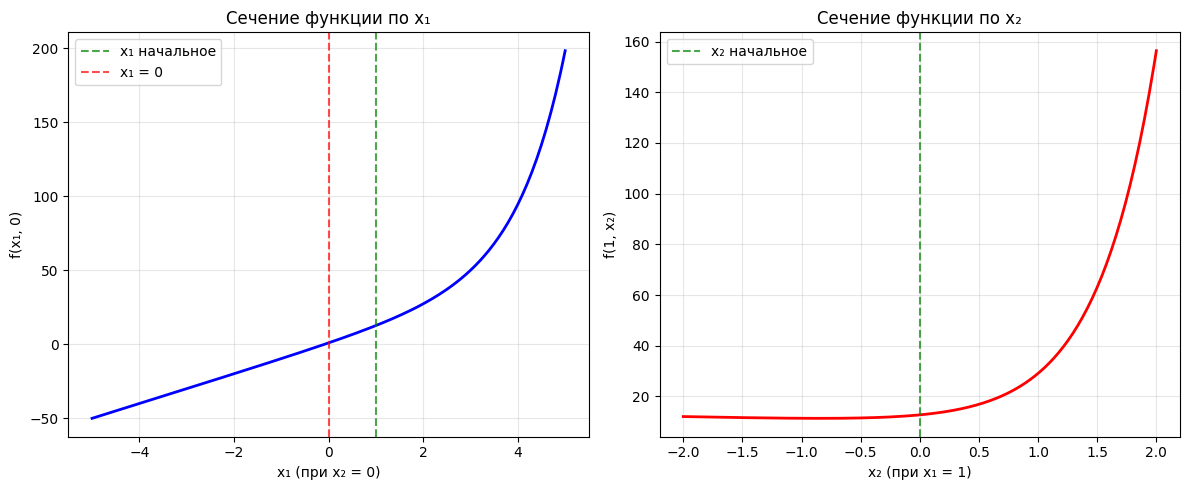

In [83]:
print("\n" + "="*80)
print("Анализ поведения функции")
print("="*80)

print("\nЗначения функции в разных точках:")
print("-"*40)

test_points = [
    (1.0, 0.0, "Начальная точка"),
    (0.0, 0.0, "Точка (0,0)"),
    (-1.0, 0.0, "Точка (-1,0)"),
    (0.0, 0.5, "Точка (0,0.5)"),
    (-5.0, 0.0, "Точка (-5,0)")
]

for x1_val, x2_val, desc in test_points:
    val = f(np.array([x1_val, x2_val]))
    print(f"  {desc:20} f({x1_val:5.1f}, {x2_val:5.1f}) = {val:15.6f}")

print("\nАнализ градиента в начальной точке:")
print("-"*40)
grad_start = grad_f(x0)
grad_norm_start = np.linalg.norm(grad_start)
print(f"  ∇f({x0[0]}, {x0[1]}) = [{grad_start[0]:.6f}, {grad_start[1]:.6f}]")
print(f"  ||∇f|| = {grad_norm_start:.6f}")

print("\nАнализ направления убывания:")
print("-"*40)
print("  В начальной точке градиент:")
print(f"    ∂f/∂x₁ = {grad_start[0]:.6f} > 0 → f возрастает по x₁")
print(f"    ∂f/∂x₂ = {grad_start[1]:.6f} > 0 → f возрастает по x₂")
print("  Метод будет двигаться против градиента:")
print("    x₁ уменьшается, x₂ уменьшается")


fig, axes = plt.subplots(1, 2, figsize=(12, 5))


ax = axes[0]
x1_test = np.linspace(-5, 5, 200)
y1_test = [f(np.array([x, 0.0])) for x in x1_test]
ax.plot(x1_test, y1_test, 'b-', linewidth=2)
ax.axvline(x=1.0, color='g', linestyle='--', alpha=0.7, label='x₁ начальное')
ax.axvline(x=0.0, color='r', linestyle='--', alpha=0.7, label='x₁ = 0')
ax.set_xlabel('x₁ (при x₂ = 0)')
ax.set_ylabel('f(x₁, 0)')
ax.set_title('Сечение функции по x₁')
ax.legend()
ax.grid(True, alpha=0.3)


ax = axes[1]
x2_test = np.linspace(-2, 2, 200)
y2_test = [f(np.array([1.0, x])) for x in x2_test]
ax.plot(x2_test, y2_test, 'r-', linewidth=2)
ax.axvline(x=0.0, color='g', linestyle='--', alpha=0.7, label='x₂ начальное')
ax.set_xlabel('x₂ (при x₁ = 1)')
ax.set_ylabel('f(1, x₂)')
ax.set_title('Сечение функции по x₂')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()